<a href="https://colab.research.google.com/github/EdisonHon/MA341_finalProject/blob/main/MA341_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step by Step

Step1：Import data

[*********************100%***********************]  1 of 1 completed


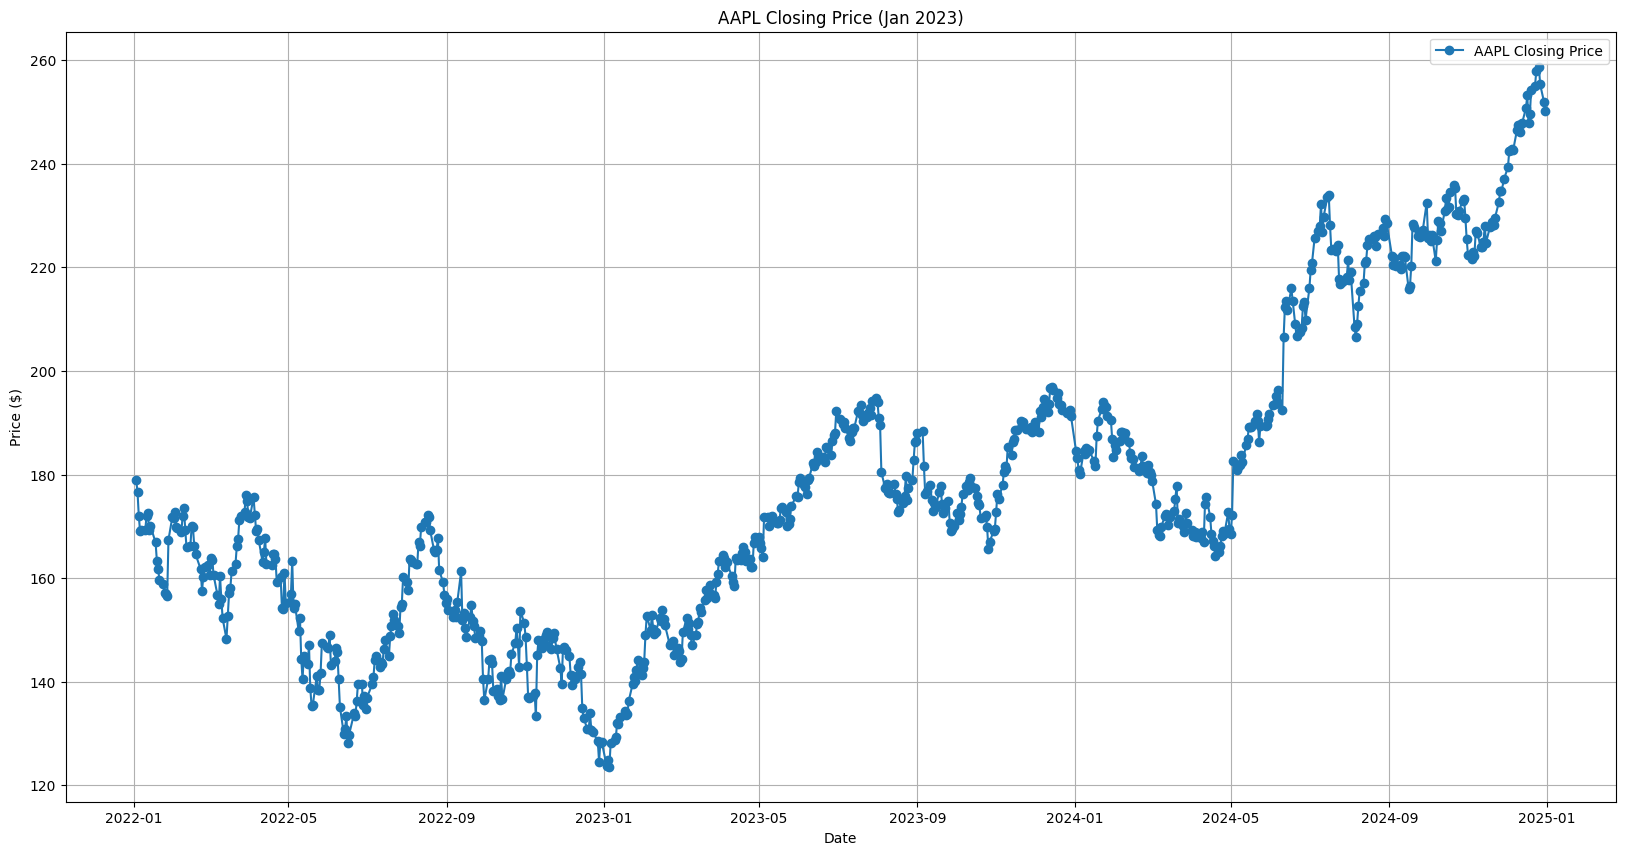

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Get AAPL data
aapl = yf.download("AAPL", start="2022-01-01", end="2025-01-01")
closing_prices = aapl['Close']

# Plot a small slice
plt.figure(figsize=(20, 10))
plt.plot(closing_prices, marker='o', linestyle='-', label='AAPL Closing Price')
plt.title('AAPL Closing Price (Jan 2023)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Step2：DFT

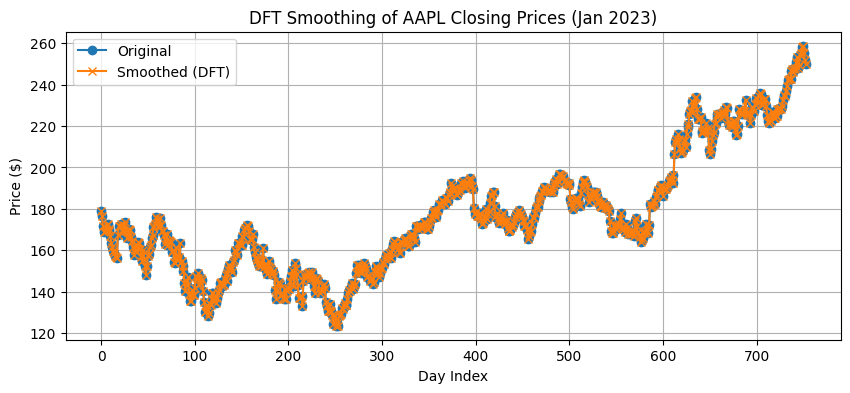

In [ ]:
import numpy as np

# Convert closing prices to a NumPy array
y = closing_prices.values
N = len(y)

# Apply DFT
y_fft = np.fft.fft(y)

# Zero out high-frequency components (keep only lowest 50%)
keep_fraction = 0.5
y_fft[int(N*keep_fraction):int(N*(1-keep_fraction))] = 0

# Apply Inverse DFT to get smoothed data
y_smooth = np.fft.ifft(y_fft)

# Step 5: Plot original vs smoothed
plt.figure(figsize=(10, 4))
plt.plot(y, label='Original', marker='o')
plt.plot(y_smooth.real, label='Smoothed (DFT)', marker='x')
plt.title('DFT Smoothing of AAPL Closing Prices (Jan 2023)')
plt.xlabel('Day Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Step3：Newton's

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np

# Get real part of the smoothed signal
y_smooth_real = y_smooth.real
x = np.arange(len(y_smooth_real))
# Interpolate the smoothed signal
smooth_func = CubicSpline(x, y_smooth_real)
# First derivative of the smoothed function
smooth_func_prime = smooth_func.derivative()
# Second derivative (needed for Newton's method)
smooth_func_double_prime = smooth_func.derivative(2)
# Newton's method implementation
def newton_method(f_prime, f_double_prime, x0, tol=1e-5, max_iter=20):
    x = x0
    for _ in range(max_iter):
        fx = f_prime(x)
        fpx = f_double_prime(x)
        if abs(fpx) < 1e-8:  # Avoid division by near-zero
            break
        x_new = x - fx / fpx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return None  # Did not converge


In [ ]:
# Try Newton's Method starting at every 3rd index
extrema = []
for x0 in range(1, len(x)-1, 3):
    root = newton_method(smooth_func_prime, smooth_func_double_prime, x0)
    if root is not None and 0 < root < len(x) - 1:
        extrema.append(root)

# Remove duplicates (close values)
extrema = sorted(set(round(float(e), 2) for e in extrema))
extrema = np.array(extrema, dtype=float)



<ipython-input-36-c381e1b9e7e0>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  extrema = sorted(set(round(float(e), 2) for e in extrema))


Step4：plot

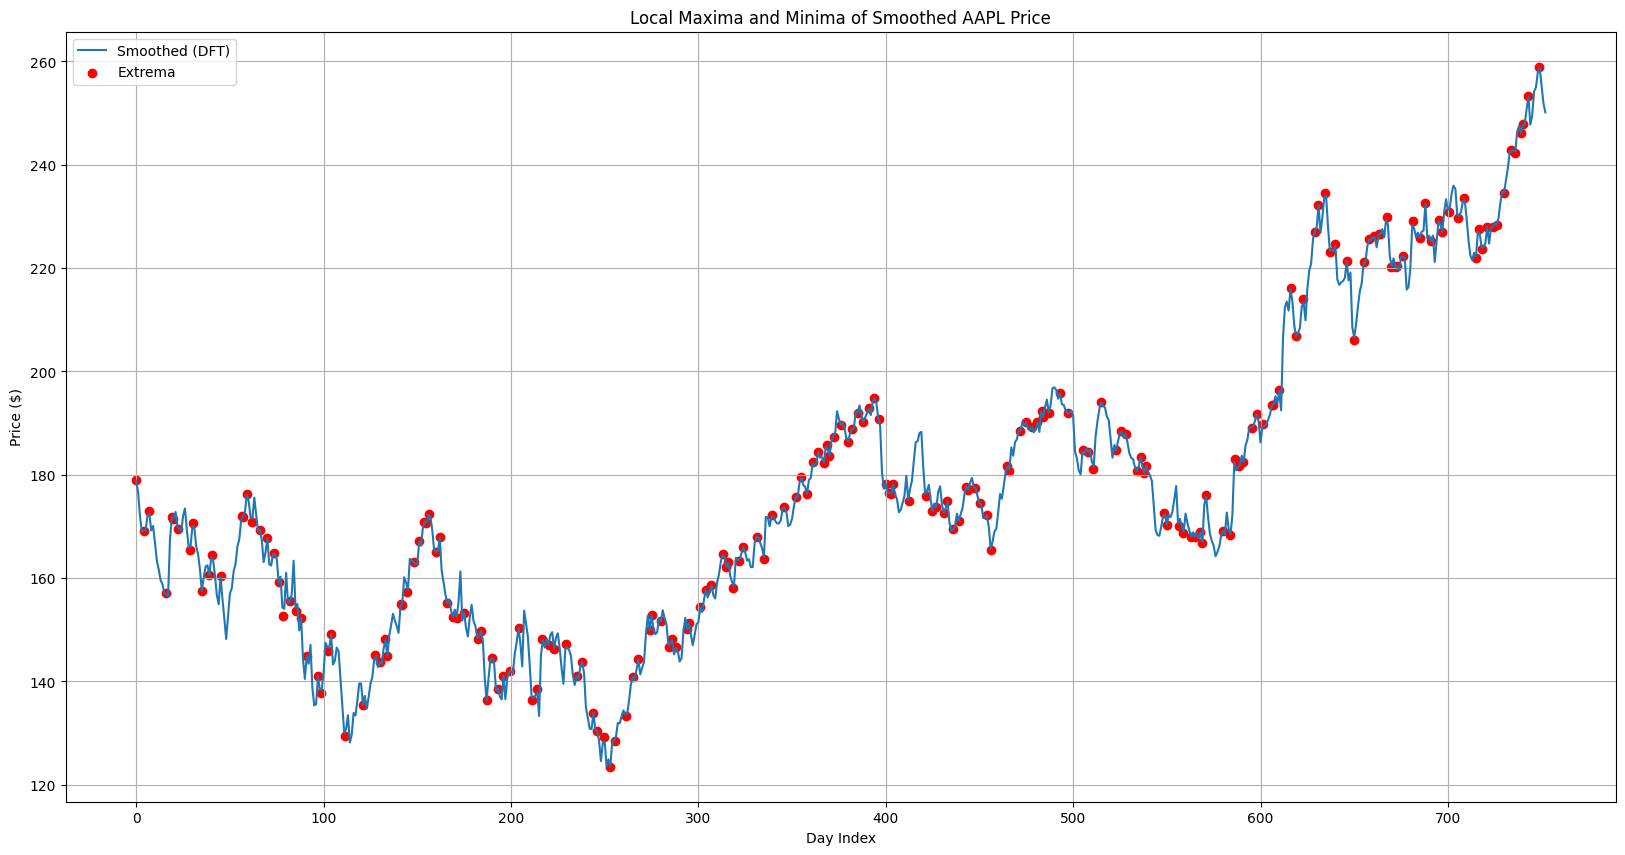

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(x, y_smooth_real, label='Smoothed (DFT)')
plt.scatter(extrema, smooth_func(extrema), color='red', label='Extrema')
plt.title('Local Maxima and Minima of Smoothed AAPL Price')
plt.xlabel('Day Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


Step5：Prediction - Product

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import timedelta

# Define major Apple event dates (iPhone launches etc.)
event_dates = {
    "2023-09-12": "iPhone 15",
    "2022-09-07": "iPhone 14",
    "2021-09-14": "iPhone 13",
    "2020-10-13": "iPhone 12",
    "2019-09-10": "iPhone 11",
    "2018-09-12": "iPhone XS",
    "2017-09-12": "iPhone X"
}

# Define time window around each event
days_before = 15
days_after = 15

# Store the data
event_data = {}

# Download AAPL prices with buffer
for date_str, label in event_dates.items():
    event_day = pd.to_datetime(date_str)
    start = event_day - timedelta(days=days_before*2)  # doubled to ensure enough trading days
    end = event_day + timedelta(days=days_after*2)

    # Download data and trim to ±15 trading days
    aapl = yf.download("AAPL", start=start, end=end)
    aapl = aapl.loc[(aapl.index >= (event_day - timedelta(days=days_before))) &
                    (aapl.index <= (event_day + timedelta(days=days_after)))]

    event_data[label] = aapl['Close']

# Print a quick summary
for label, data in event_data.items():
    print(f"\n{label} Event:")
    print(data.head())  # show the first few rows


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



iPhone 15 Event:
Ticker            AAPL
Date                  
2023-08-28  178.878952
2023-08-29  182.780334
2023-08-30  186.284668
2023-08-31  186.503082
2023-09-01  188.081512

iPhone 14 Event:
Ticker            AAPL
Date                  
2022-08-23  165.034195
2022-08-24  165.330276
2022-08-25  167.797440
2022-08-26  161.471588
2022-08-29  159.261017

iPhone 13 Event:
Ticker            AAPL
Date                  
2021-08-30  150.267426
2021-08-31  149.001465
2021-09-01  149.668808
2021-09-02  150.787567
2021-09-03  151.425461

iPhone 12 Event:
Ticker            AAPL
Date                  
2020-09-28  112.097351
2020-09-29  111.249008
2020-09-30  112.926193
2020-10-01  113.881783
2020-10-02  110.205658

iPhone 11 Event:
Ticker           AAPL
Date                 
2019-08-26  49.842510
2019-08-27  49.280087
2019-08-28  49.610783
2019-08-29  50.450775
2019-08-30  50.385612

iPhone XS Event:
Ticker           AAPL
Date                 
2018-08-28  52.220787
2018-08-29  53.000412
2018-0

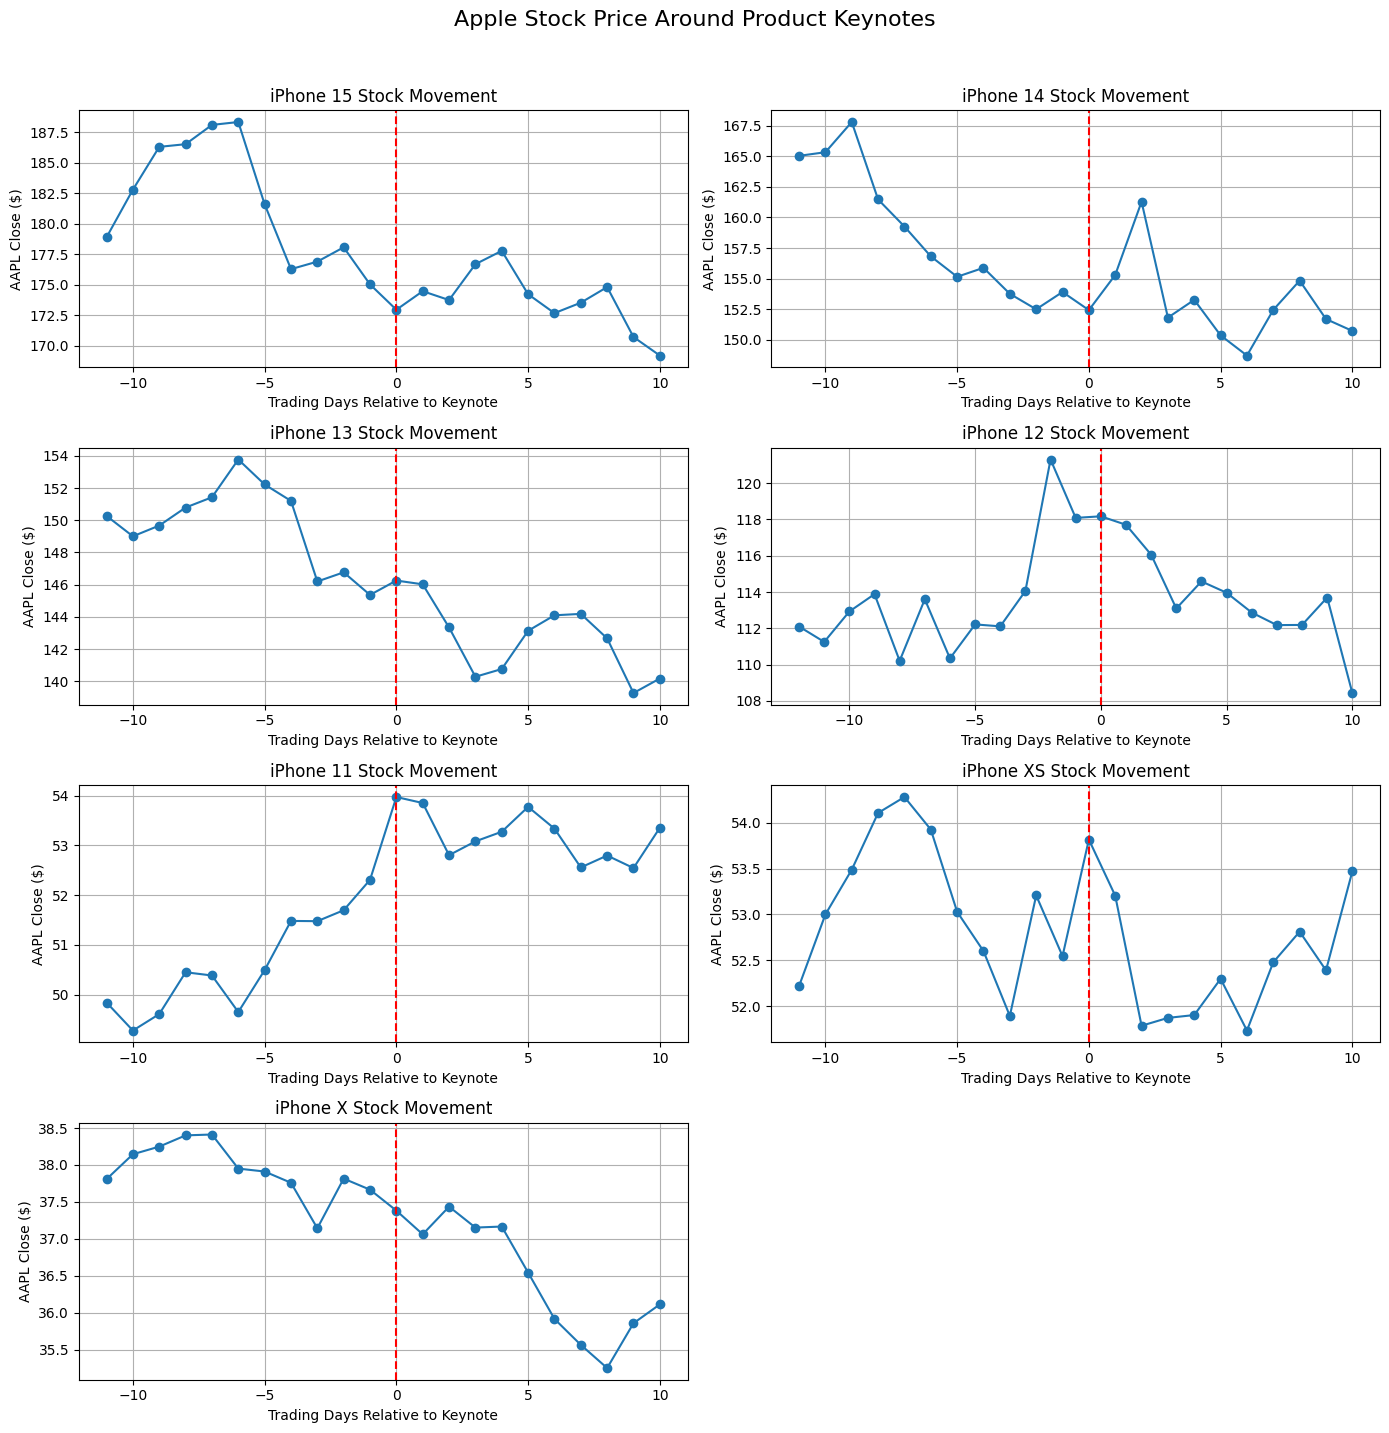

In [ ]:
import matplotlib.pyplot as plt

# Plot each event timeline in its own subplot
num_events = len(event_data)
cols = 2
rows = (num_events + 1) // cols

plt.figure(figsize=(14, 3.5 * rows))

for i, (label, prices) in enumerate(event_data.items()):
    plt.subplot(rows, cols, i + 1)

    # Reset index to make x-axis relative (Day -15 to +15)
    rel_days = range(-len(prices)//2, len(prices)//2 + 1)
    plt.plot(rel_days[:len(prices)], prices.values, marker='o')
    plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')
    plt.title(f"{label} Stock Movement")
    plt.xlabel("Trading Days Relative to Keynote")
    plt.ylabel("AAPL Close ($)")
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("Apple Stock Price Around Product Keynotes", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

For most years (iPhone X, XS, 12, 13, 14, 15). Before the event: Stock tends to rise slightly. After the event: Stock often flattens or drops a little after the announcement. iPhone 11 (2019) is the exception.

Possible Explanation for the Pattern:
1. Anticipation effect
Investors expect good news leading up to the event → buy stock beforehand → price rises.
2. Sell the news:
After the event, no matter how good the announcement is, many investors sell to take profits → price stabilizes or dips slightly.

There is a visible and somewhat regular pattern around Apple's keynotes. Most events show similar pre-event rise and post-event stabilization or drop. One or two outliers (like iPhone 11) are normal in real-world data—perfect patterns almost never happen in markets.


Step5(a): Normalize, then Average using this event data except iphone11

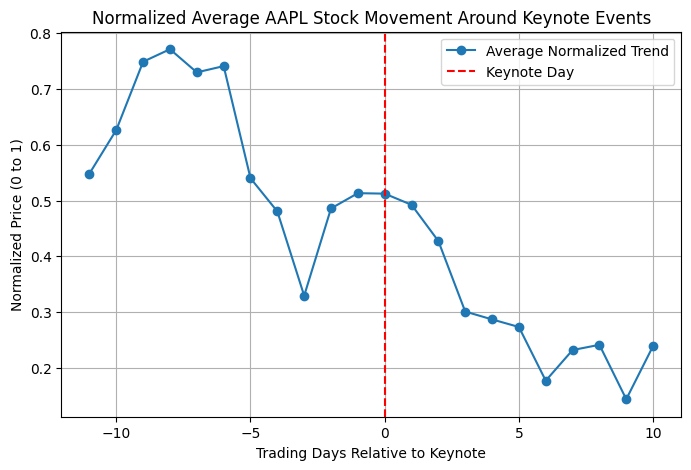

In [ ]:
# Step 1: Normalize each event to focus on trend
normalized_prices = []

# Step 1: Choose only the "good" events (excluding iPhone 11)
good_events = ["iPhone X", "iPhone XS", "iPhone 12", "iPhone 13", "iPhone 14", "iPhone 15"]

for event in good_events:
    prices = event_data[event].values

    # Trim all to same length
    min_len = min(len(event_data[e]) for e in good_events)
    prices = prices[:min_len]

    # Normalize: subtract min to make lowest point 0
    prices = prices - np.min(prices)

    # Optional: Scale to [0, 1] range
    prices = prices / (np.max(prices) - np.min(prices))

    normalized_prices.append(prices)

normalized_prices = np.array(normalized_prices)

# Step 2: Average normalized events
avg_normalized = np.mean(normalized_prices, axis=0)

# Generate x-axis (day index relative to keynote)
rel_days = np.arange(-len(avg_normalized)//2, len(avg_normalized)//2 + 1)[:len(avg_normalized)]

# Plot the normalized average trend
plt.figure(figsize=(8,5))
plt.plot(rel_days, avg_normalized, marker='o', label='Average Normalized Trend')
plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')
plt.title("Normalized Average AAPL Stock Movement Around Keynote Events")
plt.xlabel("Trading Days Relative to Keynote")
plt.ylabel("Normalized Price (0 to 1)")
plt.legend()
plt.grid(True)
plt.show()

This graph removes bias, focus on trend, and easier fitting.


Step5(b): Fit a Fourier series to this normalized, averaged data

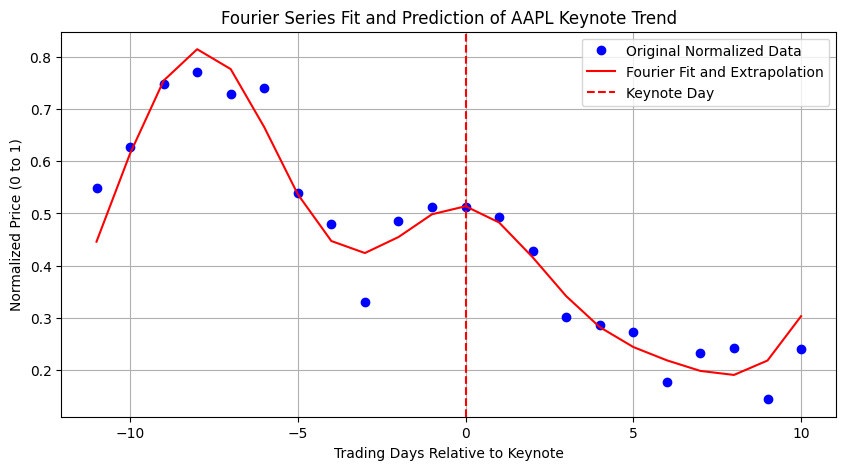

Fitted parameters (a0, a1, b1, a2, b2, a3, b3):
[ 0.44737567 -0.02096196 -0.21325929  0.03251581  0.13680226  0.05490872
 -0.02878357]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Set period
period = len(rel_days)

# Step 2: Define Fourier series model
def fourier_series(x, a0, a1, b1, a2, b2, a3, b3):
    x = np.array(x)  # ensure x is always an array
    return (a0 +
            a1 * np.cos(2 * np.pi * 1 * x / period) + b1 * np.sin(2 * np.pi * 1 * x / period) +
            a2 * np.cos(2 * np.pi * 2 * x / period) + b2 * np.sin(2 * np.pi * 2 * x / period) +
            a3 * np.cos(2 * np.pi * 3 * x / period) + b3 * np.sin(2 * np.pi * 3 * x / period))

rel_days = np.ravel(rel_days)
avg_normalized = np.ravel(avg_normalized)

# Step 3: Fit Fourier series to the normalized average trend
popt, _ = curve_fit(fourier_series, rel_days, avg_normalized)

# Step 4: Predict (only on real days, no future extrapolation)
x_extended = rel_days
y_fitted = fourier_series(x_extended, *popt)

# Step 5: Plot
plt.figure(figsize=(10, 5))
plt.plot(rel_days, avg_normalized, 'bo', label='Original Normalized Data')
plt.plot(x_extended, y_fitted, 'r-', label='Fourier Fit and Extrapolation')
plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')
plt.title('Fourier Series Fit and Prediction of AAPL Keynote Trend')
plt.xlabel('Trading Days Relative to Keynote')
plt.ylabel('Normalized Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Optional print
print("Fitted parameters (a0, a1, b1, a2, b2, a3, b3):")
print(popt)



Lowest point: 0.1905 at day 8
Highest point: 0.8148 at day -8


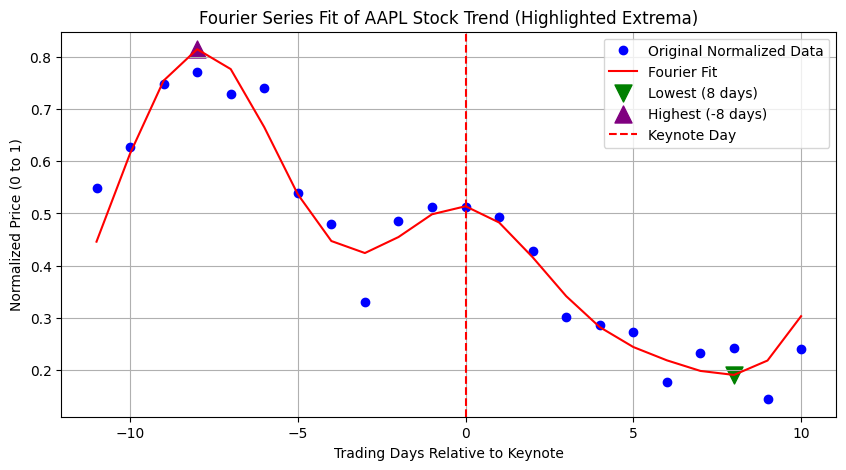

In [ ]:
# Step 8: Find the lowest and highest points of the fitted Fourier curve
min_index = np.argmin(y_fitted)
max_index = np.argmax(y_fitted)

# Get the day and value for min and max
lowest_day = x_extended[min_index]
lowest_value = y_fitted[min_index]

highest_day = x_extended[max_index]
highest_value = y_fitted[max_index]

# Print results
print(f"Lowest point: {lowest_value:.4f} at day {lowest_day}")
print(f"Highest point: {highest_value:.4f} at day {highest_day}")

# Step 9: Plot again, now with markers for highest and lowest points
plt.figure(figsize=(10, 5))
plt.plot(rel_days, avg_normalized, 'bo', label='Original Normalized Data')
plt.plot(x_extended, y_fitted, 'r-', label='Fourier Fit')
plt.scatter(lowest_day, lowest_value, color='green', marker='v', s=150, label=f'Lowest ({lowest_day} days)')
plt.scatter(highest_day, highest_value, color='purple', marker='^', s=150, label=f'Highest ({highest_day} days)')
plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')
plt.title('Fourier Series Fit of AAPL Stock Trend (Highlighted Extrema)')
plt.xlabel('Trading Days Relative to Keynote')
plt.ylabel('Normalized Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()


Step5(c): Real stock price trend line vs. Fourier fit curve

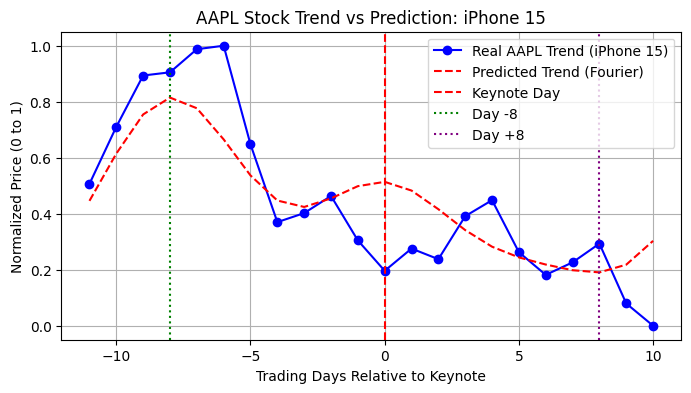

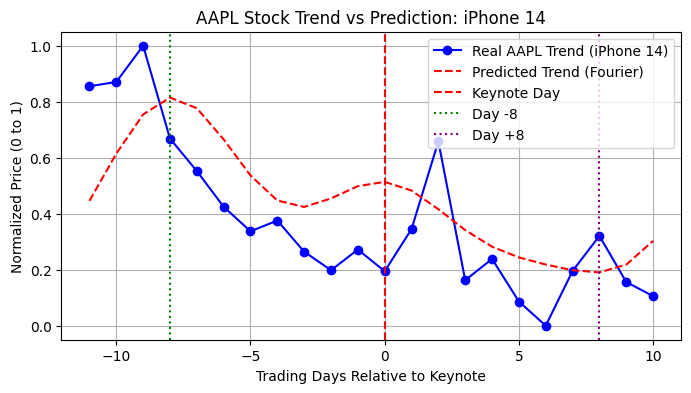

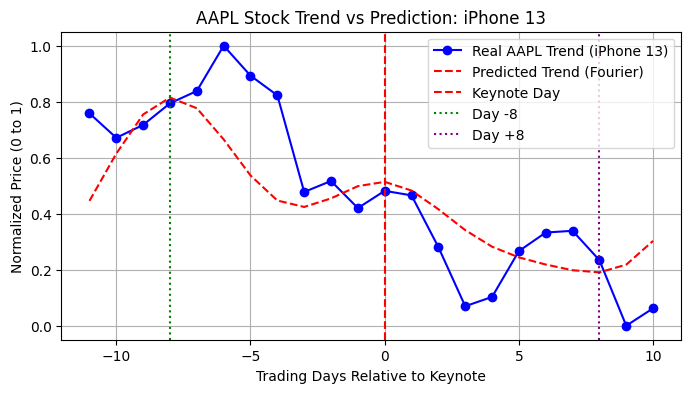

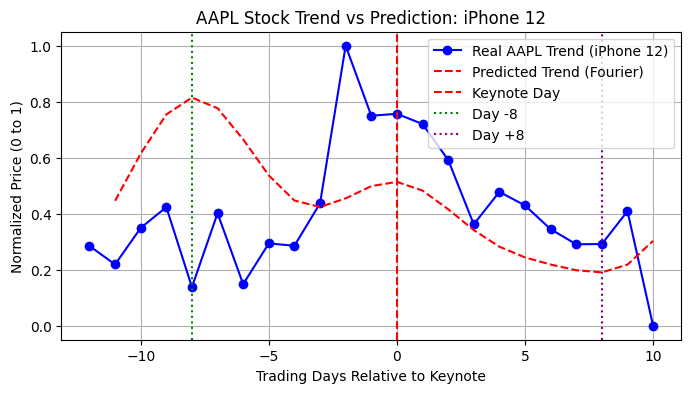

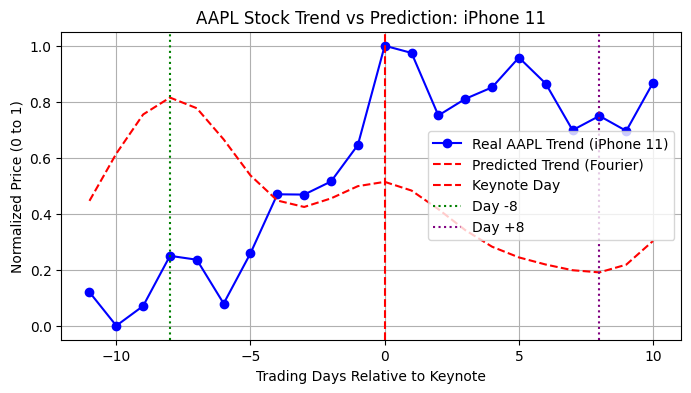

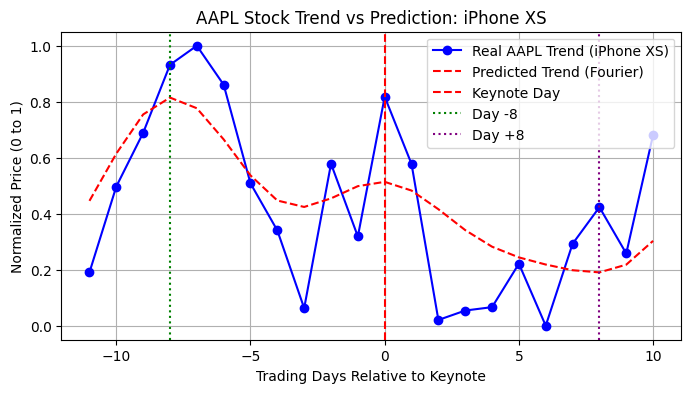

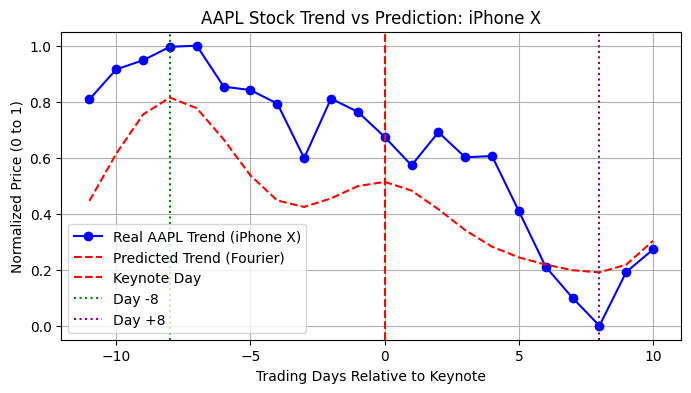

In [ ]:
# Step 1: Loop through each event
for event_date, event_name in event_dates.items():
    real_prices = event_data[event_name].values

    # Normalize real prices
    real_prices = real_prices - np.min(real_prices)
    real_prices = real_prices / (np.max(real_prices) - np.min(real_prices))

    # Relative days
    real_days = np.arange(-len(real_prices)//2, len(real_prices)//2 + 1)[:len(real_prices)]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(real_days, real_prices, 'bo-', label=f'Real AAPL Trend ({event_name})')
    plt.plot(x_extended, y_fitted, 'r--', label='Predicted Trend (Fourier)')

    # Keynote day
    plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')

    # New: Add Day -8 and Day 8 vertical lines
    plt.axvline(x=-8, color='green', linestyle=':', label='Day -8')
    plt.axvline(x=8, color='purple', linestyle=':', label='Day +8')

    # Titles and labels
    plt.title(f'AAPL Stock Trend vs Prediction: {event_name}')
    plt.xlabel('Trading Days Relative to Keynote')
    plt.ylabel('Normalized Price (0 to 1)')
    plt.legend()
    plt.grid(True)
    plt.show()


Based on analysis of AAPL stock behavior surrounding Apple keynote events from 2017 to 2023, we observed a consistent trend: stock prices tend to rise before the event, reaching a peak around eight days prior. Following the keynote, prices generally decline, reaching a local minimum around seven days after the event, and begin to rebound slightly around the eighth day. Our Fourier series prediction model successfully captured these patterns, providing a clear average trend despite small year-to-year fluctuations.



Step5(d): Fourier fit curve vs. Iphone 16

[*********************100%***********************]  1 of 1 completed


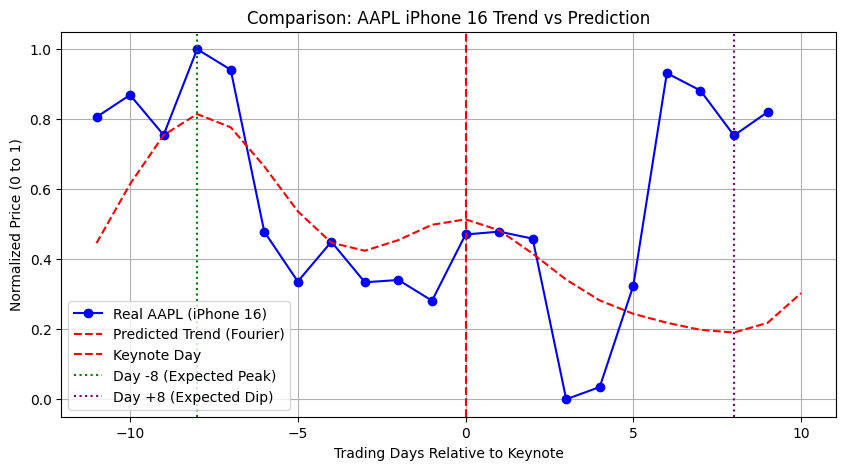

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download AAPL stock data around Sept 10, 2024
iphone16_event_date = "2024-09-10"
start_date = "2024-08-26"  # Start earlier to capture before-event behavior
end_date = "2024-09-25"    # End later to capture after-event behavior

# Fetch data
aapl_2024 = yf.download("AAPL", start=start_date, end=end_date)
aapl_close = aapl_2024['Close'].values

# Step 2: Normalize real prices
aapl_close_norm = aapl_close - np.min(aapl_close)
aapl_close_norm = aapl_close_norm / (np.max(aapl_close) - np.min(aapl_close))

# Step 3: Create relative days
real_days_2024 = np.arange(-len(aapl_close_norm)//2, len(aapl_close_norm)//2 + 1)[:len(aapl_close_norm)]

# Step 4: Predict values using existing Fourier fit
predicted_values = fourier_series(real_days_2024, *popt)  # popt already fitted earlier

# Step 5: Plot everything
plt.figure(figsize=(10, 5))
plt.plot(real_days_2024, aapl_close_norm, 'bo-', label='Real AAPL (iPhone 16)')
plt.plot(x_extended, y_fitted, 'r--', label='Predicted Trend (Fourier)')

# Mark keynote day
plt.axvline(x=0, color='red', linestyle='--', label='Keynote Day')

# Mark Day -8 (expected high) and Day +8 (expected low)
plt.axvline(x=-8, color='green', linestyle=':', label='Day -8 (Expected Peak)')
plt.axvline(x=8, color='purple', linestyle=':', label='Day +8 (Expected Dip)')

plt.title('Comparison: AAPL iPhone 16 Trend vs Prediction')
plt.xlabel('Trading Days Relative to Keynote')
plt.ylabel('Normalized Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()
